In [129]:
# Fundamental Libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, time
from tqdm import tqdm

# Machine Learning Libraries
from sklearn.metrics import confusion_matrix
import tensorflow as tf

# My models
from models import *

# Plot Aesthetics
from matplotlib.ticker import AutoMinorLocator
plt.rcParams.update({"font.family": "Times New Roman", "mathtext.fontset": "cm"})
plt.rcParams.update({"lines.linewidth": 1.2, "lines.markersize": 1.5})
plt.rcParams['axes.labelsize'] = 12

# Set random seed for reproducibility
seed = 0
tf.random.set_seed(seed)
np.random.seed(seed)
rng = np.random.RandomState(seed)

# Upload Files

In [111]:
# sRNN
sRNN_path = "./Results/sRNN"
sRNN_results_path = "/results_NN_sRNN_ep_100_ba_1000_neu_256_lr_0.001_do_0.3_rdo_0.0.txt"
sRNN_model_path = "/model_NN_sRNN_ep_100_ba_1000_neu_256_lr_0.001_do_0.3_rdo_0.0"

# Load the data
sRNN_results = pd.read_csv(sRNN_path + sRNN_results_path, header = None, index_col=0)
sRNN_model = tf.keras.models.load_model(sRNN_path + sRNN_model_path)

# LSTM 
LSTM_path = "./Results/LSTM"
LSTM_results_path = "/results_NN_LSTM_ep_100_ba_1000_neu_256_lr_0.001_do_0.2_rdo_0.5.txt"
LSTM_model_path = "/model_NN_LSTM_ep_100_ba_1000_neu_256_lr_0.001_do_0.2_rdo_0.5"

# Load the data
LSTM_results = pd.read_csv(LSTM_path + LSTM_results_path, header = None, index_col=0)
LSTM_model = tf.keras.models.load_model(LSTM_path + LSTM_model_path)

# GRU 
GRU_path = "./Results/GRU"
GRU_results_path = "/results_NN_GRU_ep_100_ba_1000_neu_256_lr_0.001_do_0.2_rdo_0.5.txt"
GRU_model_path = "/model_NN_GRU_ep_100_ba_1000_neu_256_lr_0.001_do_0.2_rdo_0.5"

# Load the data
GRU_results = pd.read_csv(GRU_path + GRU_results_path, header = None, index_col=0)
GRU_model = tf.keras.models.load_model(GRU_path + GRU_model_path)

# LMU + sRNN 
LMU_sRNN_path = "./Results/LMU_sRNN"
LMU_sRNN_results_path = "/results_NN_LMU_sRNN_ep_100_ba_1000_neu_256_lr_0.001_do_0.2_rdo_0.5.txt"
LMU_sRNN_model_path = "/model_NN_LMU_sRNN_ep_100_ba_1000_neu_256_lr_0.001_do_0.2_rdo_0.5"

# Load the data
LMU_sRNN_results = pd.read_csv(LMU_sRNN_path + LMU_sRNN_results_path, header = None, index_col=0)
LMU_sRNN_model = tf.keras.models.load_model(LMU_sRNN_path + LMU_sRNN_model_path)

# LMU + LSTM
LMU_LSTM_path = "./Results/LMU_LSTM"
LMU_LSTM_results_path = "/results_NN_LMU_LSTM_ep_100_ba_1000_neu_256_lr_0.001_do_0.2_rdo_0.5.txt"
LMU_LSTM_model_path = "/model_NN_LMU_LSTM_ep_100_ba_1000_neu_256_lr_0.001_do_0.2_rdo_0.5"

# Load the data
LMU_LSTM_results = pd.read_csv(LMU_LSTM_path + LMU_LSTM_results_path, header = None, index_col=0)
LMU_LSTM_model = tf.keras.models.load_model(LMU_LSTM_path + LMU_LSTM_model_path)

# LMU + GRU
LMU_GRU_path = "./Results/LMU_GRU"
LMU_GRU_results_path = "/results_NN_LMU_GRU_ep_100_ba_1000_neu_256_lr_0.001_do_0.2_rdo_0.5.txt"
LMU_GRU_model_path = "/model_NN_LMU_GRU_ep_100_ba_1000_neu_256_lr_0.001_do_0.2_rdo_0.5"

# Load the data
LMU_GRU_results = pd.read_csv(LMU_GRU_path + LMU_GRU_results_path, header = None, index_col=0)
LMU_GRU_model = tf.keras.models.load_model(LMU_GRU_path + LMU_GRU_model_path)

In [ ]:
sRNN_model.summary()

LSTM_model.summary()

GRU_model.summary()

LMU_sRNN_model.summary()

LMU_LSTM_model.summary()

LMU_GRU_model.summary()

Model: "SimpleRNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               66048     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 10)                2570      
                                                                 
Total params: 69,642
Trainable params: 69,130
Non-trainable params: 512
_________________________________________________________________
Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                     

# Data Understanding & Preparation

In [112]:
(X_train_image, y_train_image), (X_test_image, y_test) = tf.keras.datasets.mnist.load_data() # import MNIST dataset. 60,000 training images and 10,000 testing images

# normalizing (pixel value range from 0 -> 255 to 0 -> 1) to enhance the model performance. Float16 is used to save memory.
X_train_normalized = (X_train_image / 255).astype(np.float16) # shape (60000, 28, 28)
X_test_normalized = (X_test_image / 255).astype(np.float16) # shape (10000, 28, 28)

# reshape the data: a vector of pixels
X_train_vec = X_train_normalized.reshape((X_train_normalized.shape[0], -1, 1)) # shape (60000, 784, 1)
X_test_vec = X_test_normalized.reshape((X_test_normalized.shape[0], -1, 1)) # shape (10000, 784, 1)

# permutation of the vector components
perm = rng.permutation(X_train_vec.shape[1]) # generates a random permutation of the indices
X_train_perm = X_train_vec[:, perm]
X_test = X_test_vec[:, perm]

# split training and validation
X_train = X_train_perm[0:50000]; X_valid = X_train_perm[50000:] 
y_train = y_train_image[0:50000]; y_valid = y_train_image[50000:]

## Some visualizations

Shape of input data: (60000, 28, 28)
Shape of output data: (60000,)


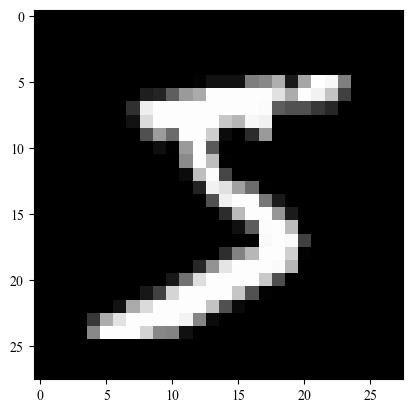

In [ ]:
# shape of imported data 
print(f'Shape of input data: {X_train_image.shape}')
print(f'Shape of output data: {y_train_image.shape}')

# Print an example of the data
plt.imshow(X_train_image[0], cmap='gray')

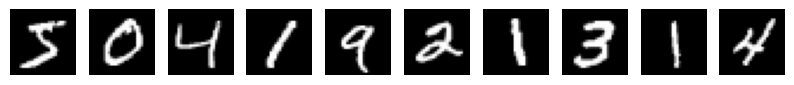

In [ ]:
# plotting the first 10 images
fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].imshow(X_train_image[i], cmap='gray')
    ax[i].axis('off')
plt.show()


# Results

In [140]:
# Non-trained models

NEURONS = 256; DROPOUT = 0.2; REC_DROPOUT = 0.5
 
sRNN_model_not_trained = sRNN(
            X_train, 
            sRNN_neurons = NEURONS, 
            dropout = 0.3, 
            rec_dropout=0.0,
            )

LSTM_model_not_trained = LSTM(
            X_train,
            LSTM_neurons = NEURONS,
            dropout = DROPOUT,
            rec_dropout=REC_DROPOUT,
            )


GRU_model_not_trained = GRU(
            X_train,
            GRU_neurons = NEURONS,
            dropout = DROPOUT,
            rec_dropout=REC_DROPOUT,
            )

non_trained_models = {
    'sRNN': sRNN_model_not_trained, 
    'LSTM': LSTM_model_not_trained, 
    'GRU': GRU_model_not_trained
}

In [113]:
results1 = {
    'sRNN': sRNN_results, 
    'LSTM': LSTM_results, 
    'GRU': GRU_results
    }

models1 = {
    'sRNN': sRNN_model, 
    'LSTM': LSTM_model, 
    'GRU': GRU_model
}

colors1 = {
    'sRNN': '#4C72B0', 
    'LSTM': '#DD8452', 
    'GRU': '#55A868'
    }

results2 = {
    'LMU + sRNN': LMU_sRNN_results.iloc[:, :60], 
    'LMU + LSTM': LMU_LSTM_results.iloc[:, :60], 
    'LMU + GRU': LMU_GRU_results.iloc[:, :60]
    }

models2 = {
    'LMU + sRNN': LMU_sRNN_model, 
    'LMU + LSTM': LMU_LSTM_model, 
    'LMU + GRU': LMU_GRU_model
}

colors2 = {
    'LMU + sRNN': '#4C72B0', 
    'LMU + LSTM': '#DD8452', 
    'LMU + GRU': '#55A868'
    }

results = {**results1, **results2}
models = {**models1, **models2}

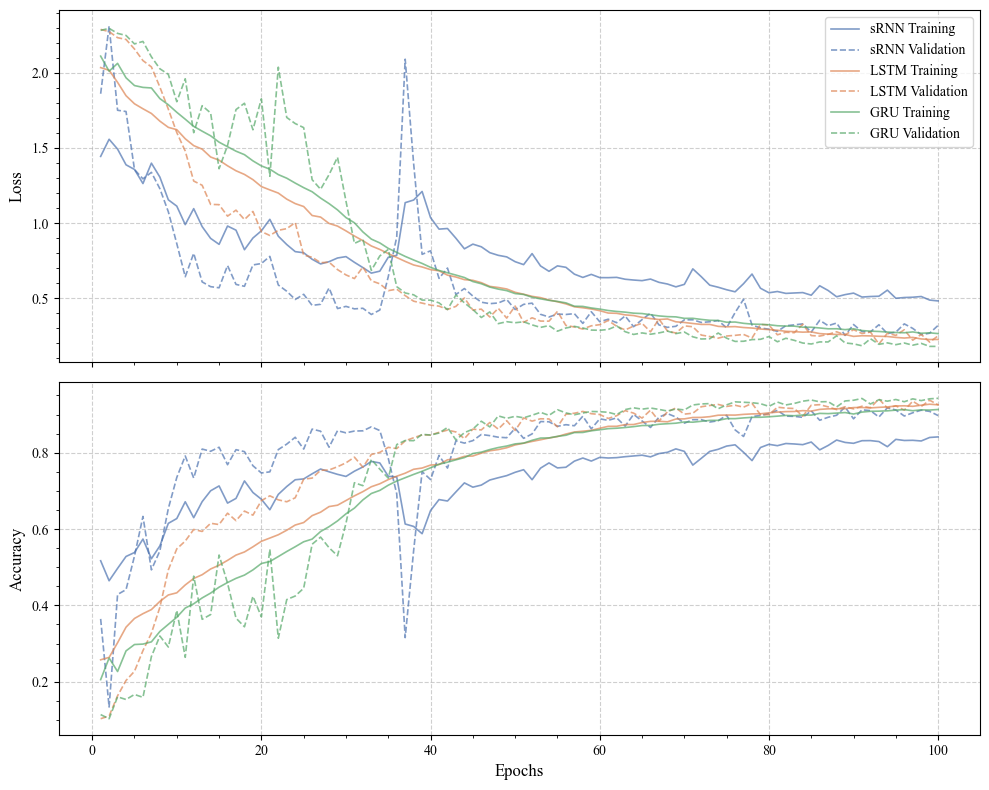

In [118]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 8))

for model_name, df in results1.items():
    epochs = range(1, df.shape[1] + 1)
    ax1.plot(epochs, df.loc['loss'], label=f'{model_name} Training', color=colors1[model_name], linestyle='-', alpha=0.7)
    ax1.plot(epochs, df.loc['val_loss'], label=f'{model_name} Validation', color=colors1[model_name], linestyle='--', alpha=0.7)
    ax2.plot(epochs, df.loc['accuracy'], color=colors1[model_name], linestyle='-', alpha=0.7)
    ax2.plot(epochs, df.loc['val_accuracy'], color=colors1[model_name], linestyle='--', alpha=0.7)

ax1.set_ylabel('Loss')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc='upper right')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

plt.tight_layout()
# fig.savefig('./Figures/simple_loss_accuracy_plots.png', dpi=300)
plt.show()

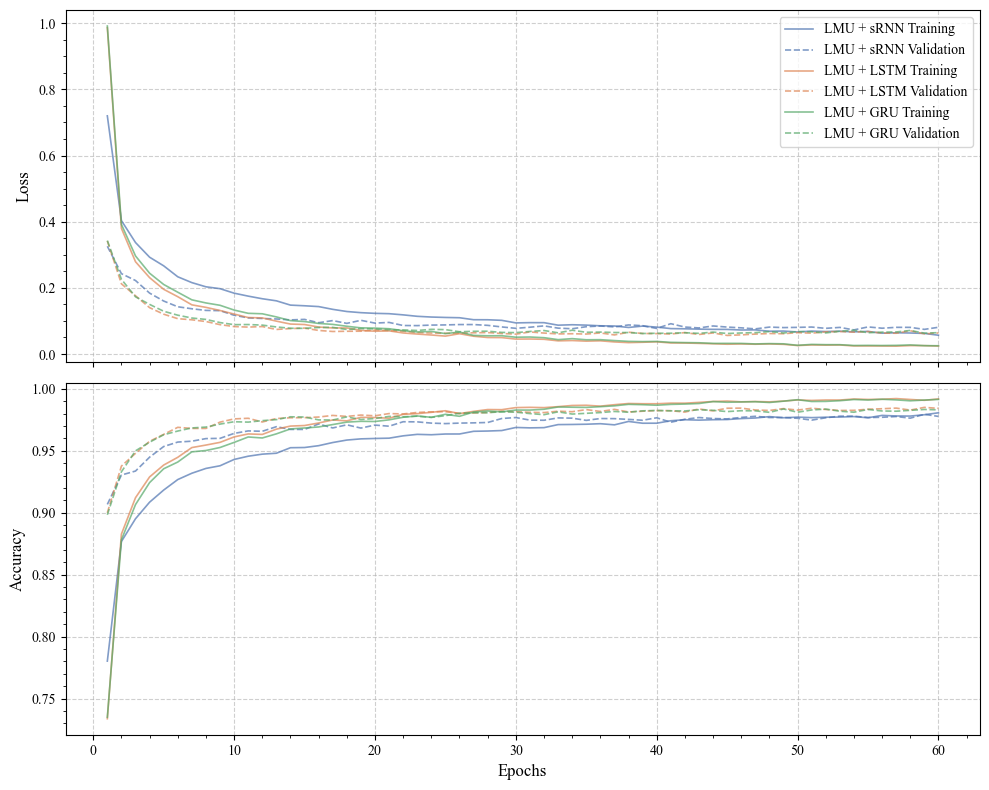

In [119]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 8))

for model_name, df in results2.items():
    epochs = range(1, df.shape[1] + 1)
    ax1.plot(epochs, df.loc['loss'], label=f'{model_name} Training', color=colors2[model_name], linestyle='-', alpha=0.7)
    ax1.plot(epochs, df.loc['val_loss'], label=f'{model_name} Validation', color=colors2[model_name], linestyle='--', alpha=0.7)
    ax2.plot(epochs, df.loc['accuracy'], color=colors2[model_name], linestyle='-', alpha=0.7)
    ax2.plot(epochs, df.loc['val_accuracy'], color=colors2[model_name], linestyle='--', alpha=0.7)

ax1.set_ylabel('Loss')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc='upper right')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

plt.tight_layout()
# fig.savefig('./Figures/LMU_loss_accuracy_plots.png', dpi=300)

plt.show()

In [8]:
def create_summary_df(input_dict):
    # List of models in the specified order
    models = ['sRNN', 'LSTM', 'GRU', 'LMU + sRNN', 'LMU + LSTM', 'LMU + GRU']
    
    # Initialize an empty list to hold the summary data
    summary_data = []
    
    for model in models:
        # Get the DataFrame for the current model
        df = input_dict[model]
        
        # Extract the required metrics
        training_loss = df.loc['loss'].values[-1]
        validation_loss = df.loc['val_loss'].values[-1]
        test_loss = df.loc['loss'].values[-1]  # Assuming test loss is same as final loss
        
        training_accuracy = df.loc['accuracy'].values[-1]
        validation_accuracy = df.loc['val_accuracy'].values[-1]
        test_accuracy = df.loc['accuracy'].values[-1]  # Assuming test accuracy is same as final accuracy
        
        # Time per epoch (assumed to be stored separately, this is a placeholder)
        time_per_epoch = 0.0
        
        # Number of parameters (this would need to be provided separately, placeholder here)
        num_params = 0
        
        # Append the extracted data to the summary list
        summary_data.append([
            model, num_params, training_loss, validation_loss, test_loss,
            training_accuracy, validation_accuracy, test_accuracy, time_per_epoch
        ])
    
    # Create a DataFrame from the summary data
    summary_df = pd.DataFrame(summary_data, columns=[
        'Model Name', 'Number of parameters used', 'Training loss',
        'Validation loss', 'Test loss', 'Training Accuracy', 'Validation Accuracy',
        'Test Accuracy', 'Time per epoch'
    ])
    
    return summary_df

df = create_summary_df(results)
df

,Model Name,Number of parameters used,Training loss,Validation loss,Test loss,Training Accuracy,Validation Accuracy,Test Accuracy,Time per epoch
0,sRNN,0,0.482484,0.320003,0.482484,0.84148,0.8974,0.84148,0.0
1,LSTM,0,0.226317,0.250702,0.226317,0.92558,0.9254,0.92558,0.0
2,GRU,0,0.265258,0.179989,0.265258,0.91326,0.9426,0.91326,0.0
3,LMU + sRNN,0,0.056834,0.080873,0.056834,0.98062,0.9777,0.98062,0.0
4,LMU + LSTM,0,0.024089,0.063725,0.024089,0.99182,0.9842,0.99182,0.0
5,LMU + GRU,0,0.024996,0.064648,0.024996,0.99140,0.9830,0.99140,0.0


In [ ]:
for name, model in models.items():
    print("---------------------------------------")
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'{name}: loss = {loss:.4f}, accurcay = {accuracy:.2%}')
    print("---------------------------------------")
    

---------------------------------------
313/313 [==============================] - 25s 78ms/step - loss: 0.3406 - accuracy: 0.8920
sRNN: loss = 0.3406, accurcay = 89.20%
---------------------------------------
---------------------------------------
313/313 [==============================] - 83s 266ms/step - loss: 0.2637 - accuracy: 0.9253
LSTM: loss = 0.2637, accurcay = 92.53%
---------------------------------------
---------------------------------------
313/313 [==============================] - 71s 228ms/step - loss: 0.1969 - accuracy: 0.9366
GRU: loss = 0.1969, accurcay = 93.66%
---------------------------------------
---------------------------------------
313/313 [==============================] - 51s 164ms/step - loss: 0.2351 - accuracy: 0.9327
LMU + sRNN: loss = 0.2351, accurcay = 93.27%
---------------------------------------
---------------------------------------
313/313 [==============================] - 115s 366ms/step - loss: 0.0643 - accuracy: 0.9832
LMU + LSTM: loss = 

# Interpretability

In [127]:
def confusion_matrix_plot(model, X_test, y_test, save=False):
    y_pred = model.predict(X_test) # Predict the labels of the test set (notice the logits are returned, for probabilities use model.predict_proba()
    y_pred = np.argmax(y_pred, axis=1) # Get the class with the highest probability across each instance
    cm = confusion_matrix(y_test, y_pred) # Compute the confusion matrix
    
    # Plotting the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=np.arange(10), yticklabels=np.arange(10), linewidths=0.7)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix ({model.name})')
    
    if save: plt.savefig(f'./Figures/{model.name}_confusion_matrix.png', dpi=300)
    
    plt.show()

Confusion Matrix for sRNN
313/313 [==============================] - 28s 89ms/step


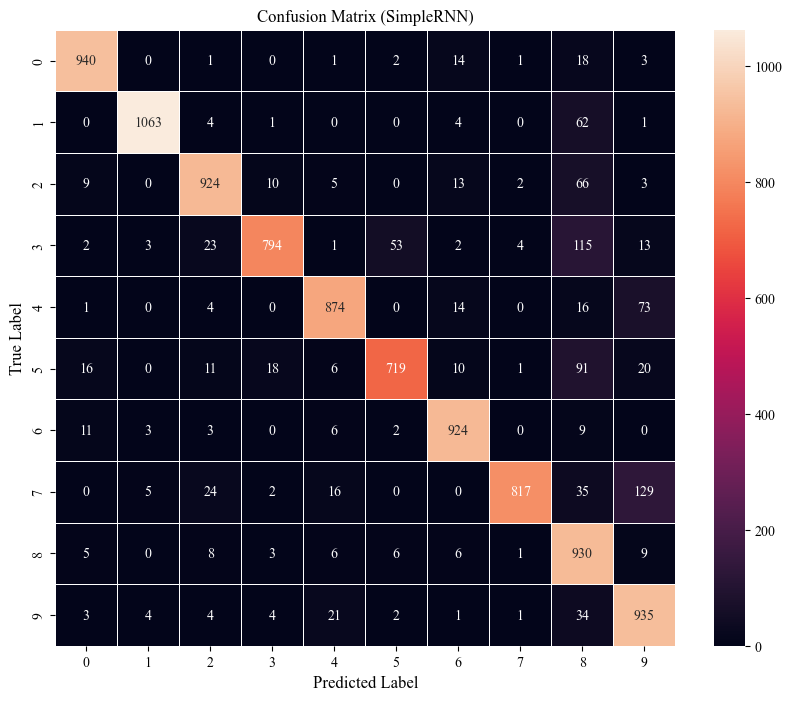

Confusion Matrix for LSTM
313/313 [==============================] - 90s 286ms/step


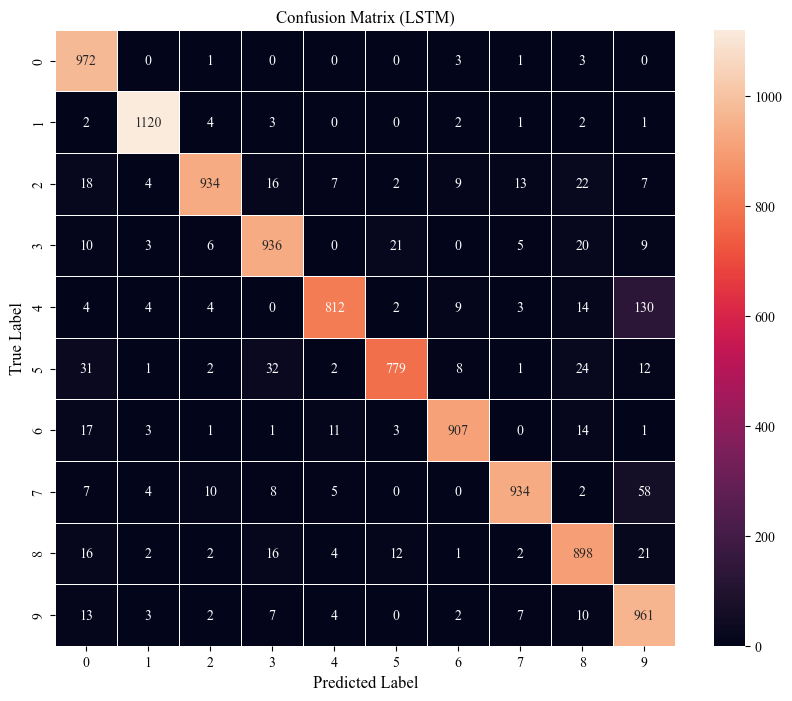

Confusion Matrix for GRU
313/313 [==============================] - 85s 272ms/step


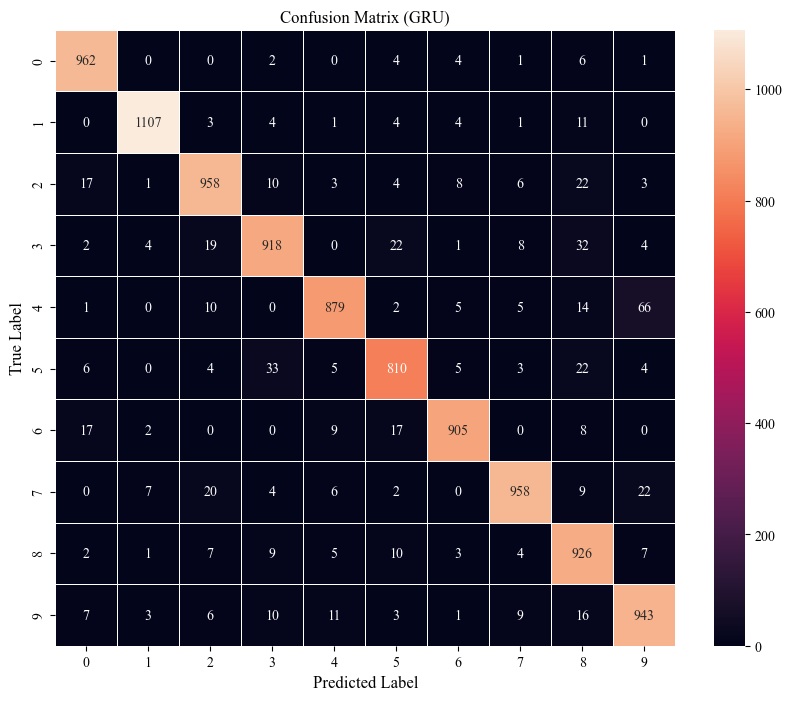

Confusion Matrix for LMU + sRNN
313/313 [==============================] - 42s 133ms/step


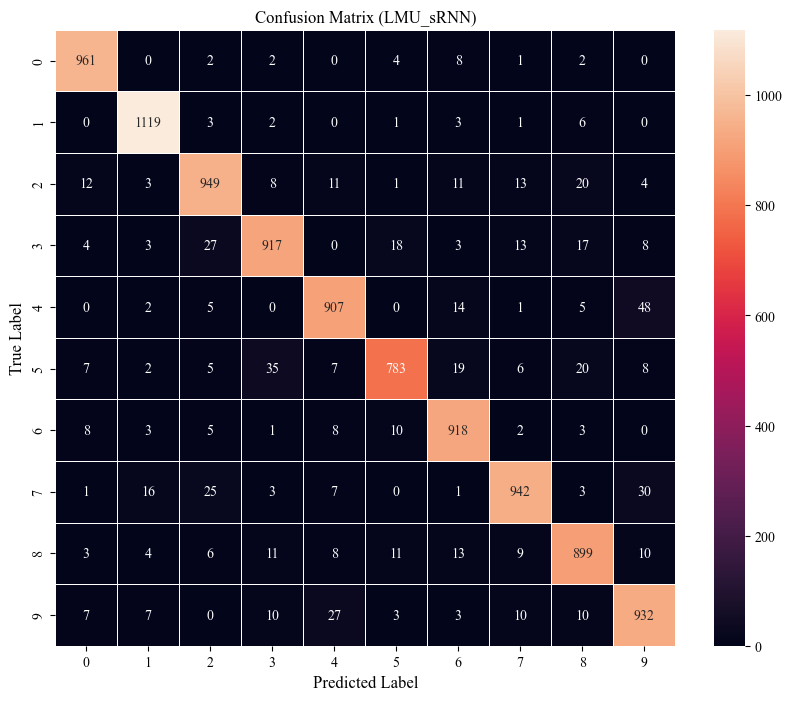

Confusion Matrix for LMU + LSTM
313/313 [==============================] - 106s 338ms/step


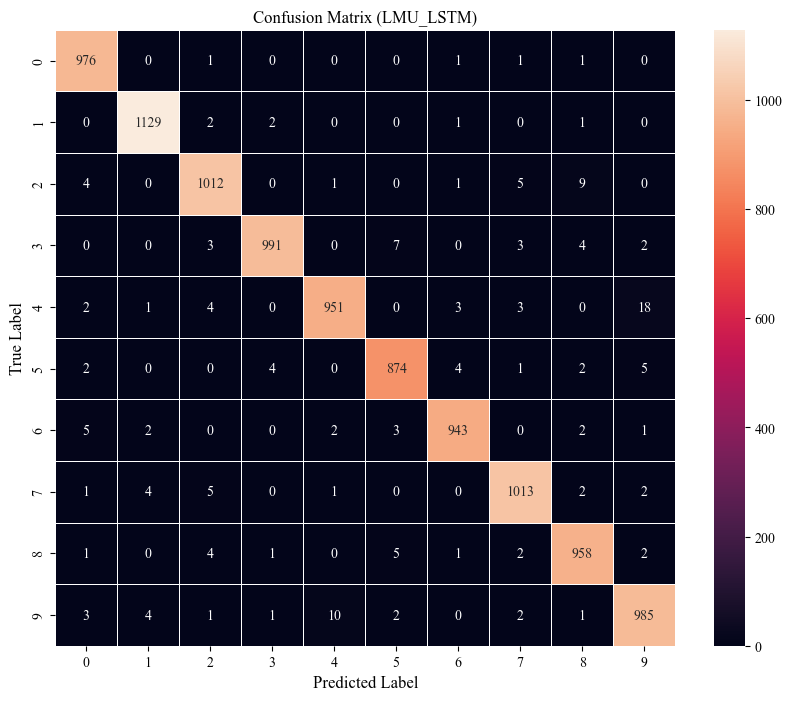

Confusion Matrix for LMU + GRU
313/313 [==============================] - 90s 286ms/step


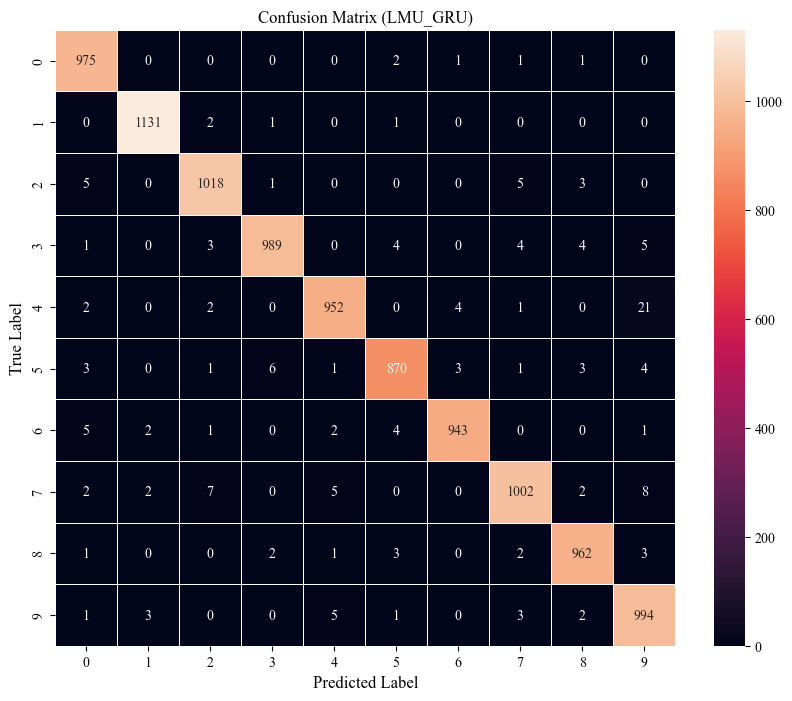

In [128]:
for name, model in models.items():
    print(f'Confusion Matrix for {name}')
    confusion_matrix_plot(model, X_test, y_test, save=True)

## Weigths Structure

Model: sRNN
Kernel weights - mean: 0.018029192462563515, std: 0.2246328741312027, min: -0.6899662017822266, max: 0.6967794299125671
Recurrent weights - mean: -0.0006790733896195889, std: 0.06796993315219879, min: -0.3052853047847748, max: 0.28305673599243164
Biases - mean: -0.0008807381382212043, std: 0.027709491550922394, min: -0.06149156764149666, max: 0.0607609897851944


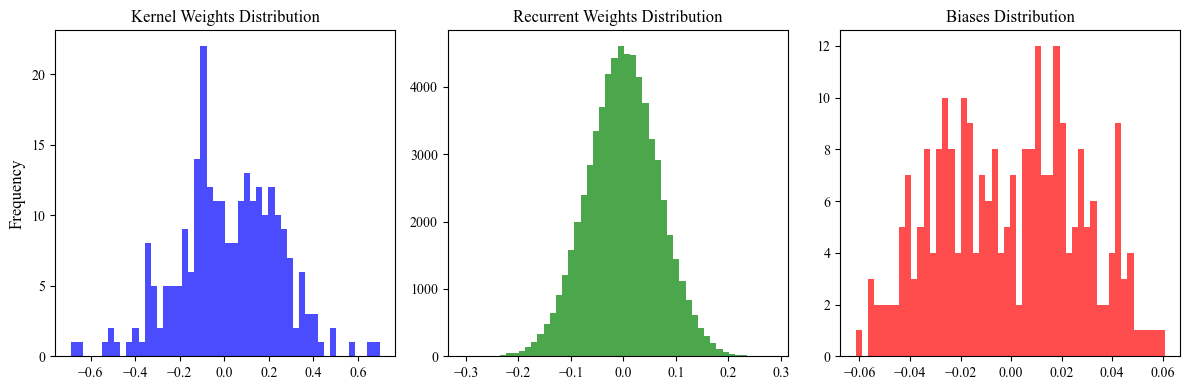

Model: LSTM
Kernel weights - mean: -0.095672607421875, std: 0.7617144584655762, min: -3.766108751296997, max: 2.306250810623169
Recurrent weights - mean: -0.0002994275710079819, std: 0.09848088026046753, min: -1.1805859804153442, max: 1.0320415496826172
Biases - mean: 0.25251972675323486, std: 0.5201660990715027, min: -0.45203855633735657, max: 1.4033236503601074


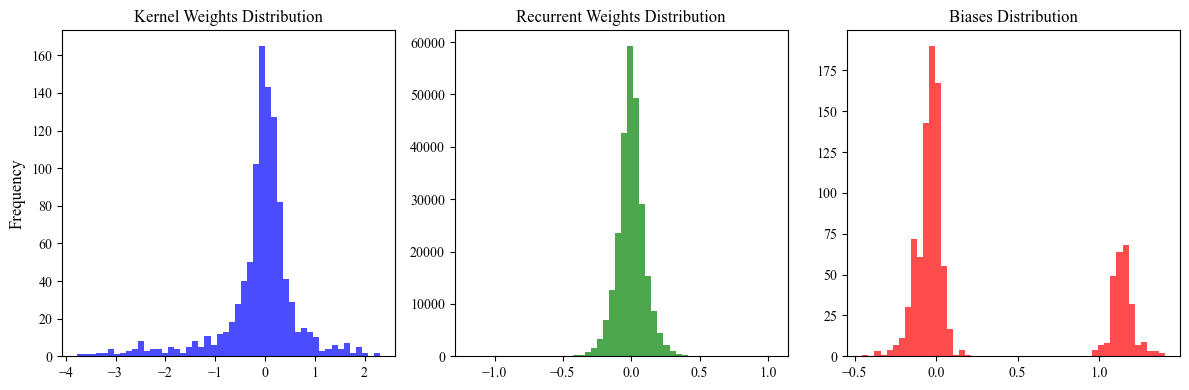

Model: GRU
Kernel weights - mean: 0.04087762162089348, std: 0.7613914012908936, min: -3.4079322814941406, max: 4.241800308227539
Recurrent weights - mean: 6.418416887754574e-05, std: 0.14754188060760498, min: -1.5288697481155396, max: 1.6208536624908447
Biases - mean: 0.1391649693250656, std: 0.2807740271091461, min: -0.4627588093280792, max: 1.4218379259109497


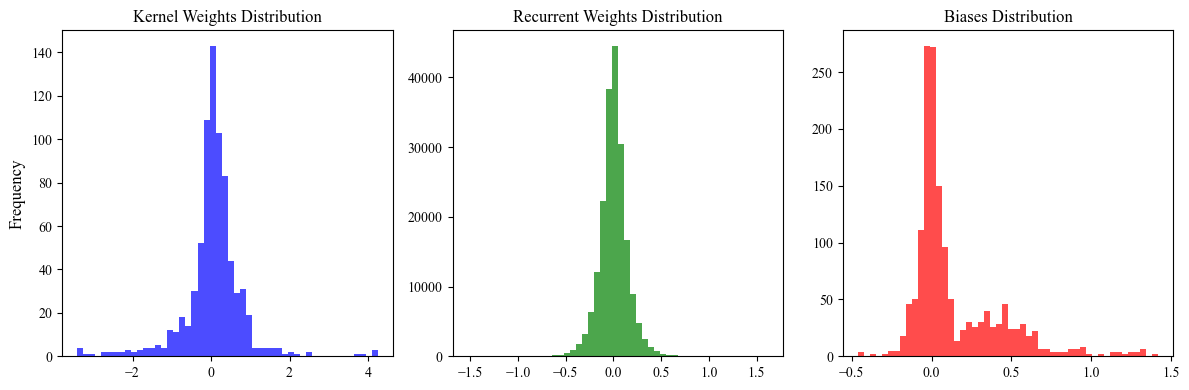

In [150]:
for name, model in models1.items():
    print(f'Model: {name}')
    weigths = model.layers[0].get_weights()
    # Kernel weights (input to hidden)
    kernel_weights = weigths[0]
    # Recurrent weights (hidden to hidden)
    recurrent_weights = weigths[1]
    # Biases
    biases = weigths[2]
    
    # Compute statistics for kernel weights
    kernel_mean = np.mean(kernel_weights)
    kernel_std = np.std(kernel_weights)
    kernel_min = np.min(kernel_weights)
    kernel_max = np.max(kernel_weights)

    # Compute statistics for recurrent weights
    recurrent_mean = np.mean(recurrent_weights)
    recurrent_std = np.std(recurrent_weights)
    recurrent_min = np.min(recurrent_weights)
    recurrent_max = np.max(recurrent_weights)

    # Compute statistics for biases
    biases_mean = np.mean(biases)
    biases_std = np.std(biases)
    biases_min = np.min(biases)
    biases_max = np.max(biases)

    print(f"Kernel weights - mean: {kernel_mean}, std: {kernel_std}, min: {kernel_min}, max: {kernel_max}")
    print(f"Recurrent weights - mean: {recurrent_mean}, std: {recurrent_std}, min: {recurrent_min}, max: {recurrent_max}")
    print(f"Biases - mean: {biases_mean}, std: {biases_std}, min: {biases_min}, max: {biases_max}")
    
    
    # Plot histograms
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.hist(kernel_weights.flatten(), bins=50, color='blue', alpha=0.7)
    plt.title('Kernel Weights Distribution')
    # plt.xlabel('Weight Value')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    plt.hist(recurrent_weights.flatten(), bins=50, color='green', alpha=0.7)
    plt.title('Recurrent Weights Distribution')
    # plt.xlabel('Weight Value')
    # plt.ylabel('Frequency')

    plt.subplot(1, 3, 3)
    plt.hist(biases.flatten(), bins=50, color='red', alpha=0.7)
    plt.title('Biases Distribution')
    # plt.xlabel('Bias Value')
    # plt.ylabel('Frequency')

    plt.tight_layout()
    plt.savefig(f'./Figures/{name}_weights_histograms_trained_model.png', dpi=300)

    plt.show()

Model: sRNN
Kernel weights - mean: -0.007695707958191633, std: 0.08603326976299286, min: -0.15249887108802795, max: 0.1522863358259201
Recurrent weights - mean: -9.935173875419423e-05, std: 0.06249992176890373, min: -0.2650351822376251, max: 0.26571398973464966
Biases - mean: 0.0, std: 0.0, min: 0.0, max: 0.0


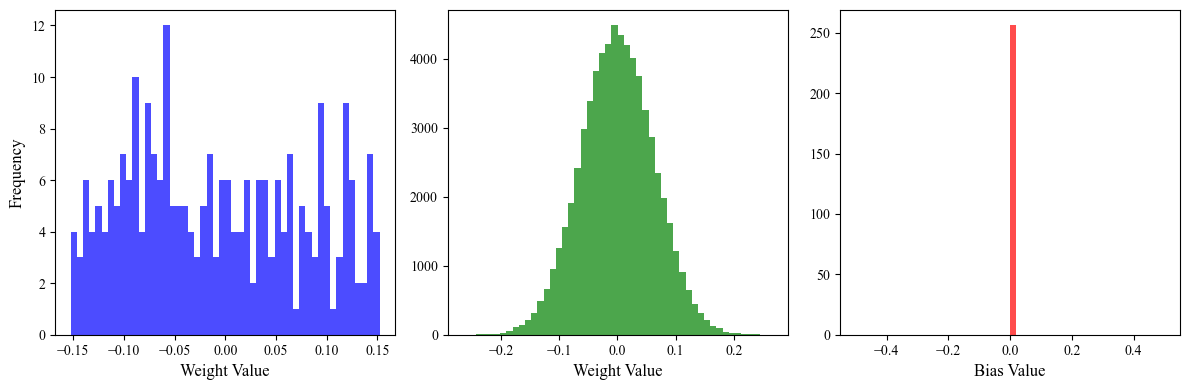

Model: LSTM
Kernel weights - mean: 0.0023455354385077953, std: 0.04452197626233101, min: -0.07645484805107117, max: 0.07617564499378204
Recurrent weights - mean: -8.504635479766876e-05, std: 0.0312498826533556, min: -0.14411066472530365, max: 0.1393580436706543
Biases - mean: 0.25, std: 0.4330126941204071, min: 0.0, max: 1.0


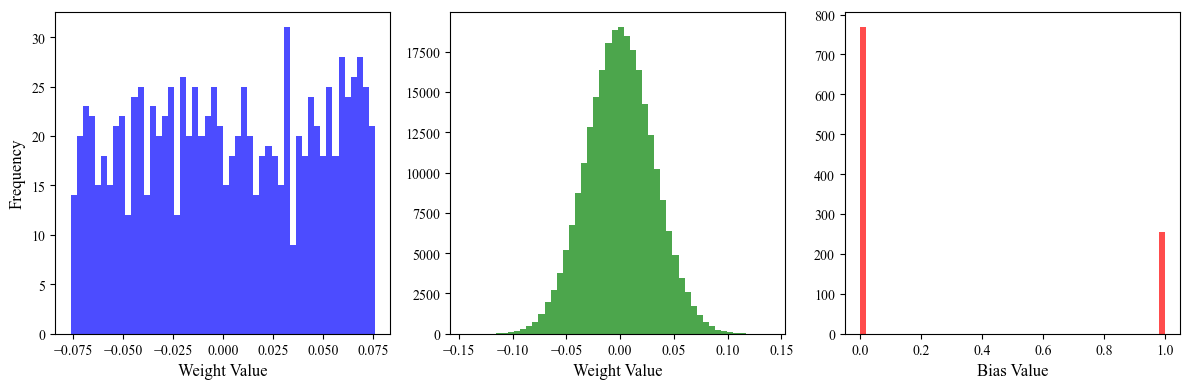

Model: GRU
Kernel weights - mean: -0.000529322715010494, std: 0.04974417760968208, min: -0.08811050653457642, max: 0.08828713744878769
Recurrent weights - mean: -0.00012702315871138126, std: 0.03608417138457298, min: -0.17227871716022491, max: 0.16119490563869476
Biases - mean: 0.0, std: 0.0, min: 0.0, max: 0.0


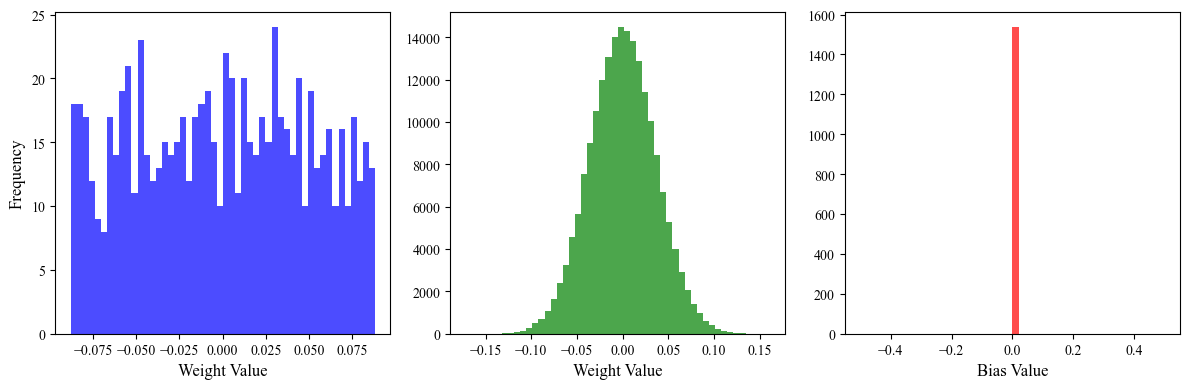

In [151]:
for name, model in non_trained_models.items():
    print(f'Model: {name}')
    weigths = model.layers[0].get_weights()
    # Kernel weights (input to hidden)
    kernel_weights = weigths[0]
    # Recurrent weights (hidden to hidden)
    recurrent_weights = weigths[1]
    # Biases
    biases = weigths[2]
    
    # Compute statistics for kernel weights
    kernel_mean = np.mean(kernel_weights)
    kernel_std = np.std(kernel_weights)
    kernel_min = np.min(kernel_weights)
    kernel_max = np.max(kernel_weights)

    # Compute statistics for recurrent weights
    recurrent_mean = np.mean(recurrent_weights)
    recurrent_std = np.std(recurrent_weights)
    recurrent_min = np.min(recurrent_weights)
    recurrent_max = np.max(recurrent_weights)

    # Compute statistics for biases
    biases_mean = np.mean(biases)
    biases_std = np.std(biases)
    biases_min = np.min(biases)
    biases_max = np.max(biases)

    print(f"Kernel weights - mean: {kernel_mean}, std: {kernel_std}, min: {kernel_min}, max: {kernel_max}")
    print(f"Recurrent weights - mean: {recurrent_mean}, std: {recurrent_std}, min: {recurrent_min}, max: {recurrent_max}")
    print(f"Biases - mean: {biases_mean}, std: {biases_std}, min: {biases_min}, max: {biases_max}")
    
    # Plot histograms
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.hist(kernel_weights.flatten(), bins=50, color='blue', alpha=0.7)
    # plt.title('Kernel Weights Distribution')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    plt.hist(recurrent_weights.flatten(), bins=50, color='green', alpha=0.7)
    # plt.title('Recurrent Weights Distribution')
    plt.xlabel('Weight Value')
    # plt.ylabel('Frequency')

    plt.subplot(1, 3, 3)
    plt.hist(biases.flatten(), bins=50, color='red', alpha=0.7)
    # plt.title('Biases Distribution')
    plt.xlabel('Bias Value')
    # plt.ylabel('Frequency')

    plt.tight_layout()
    plt.savefig(f'./Figures/{name}_weights_histograms_non_trained_model.png', dpi=300)

    plt.show()

Model: sRNN


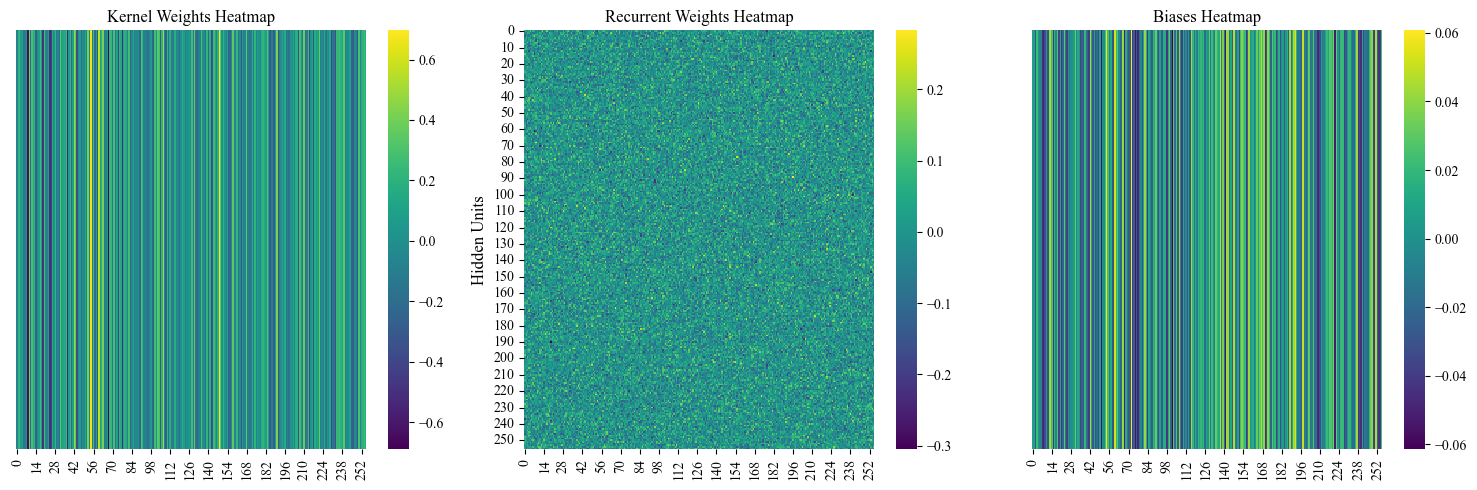

Model: LSTM


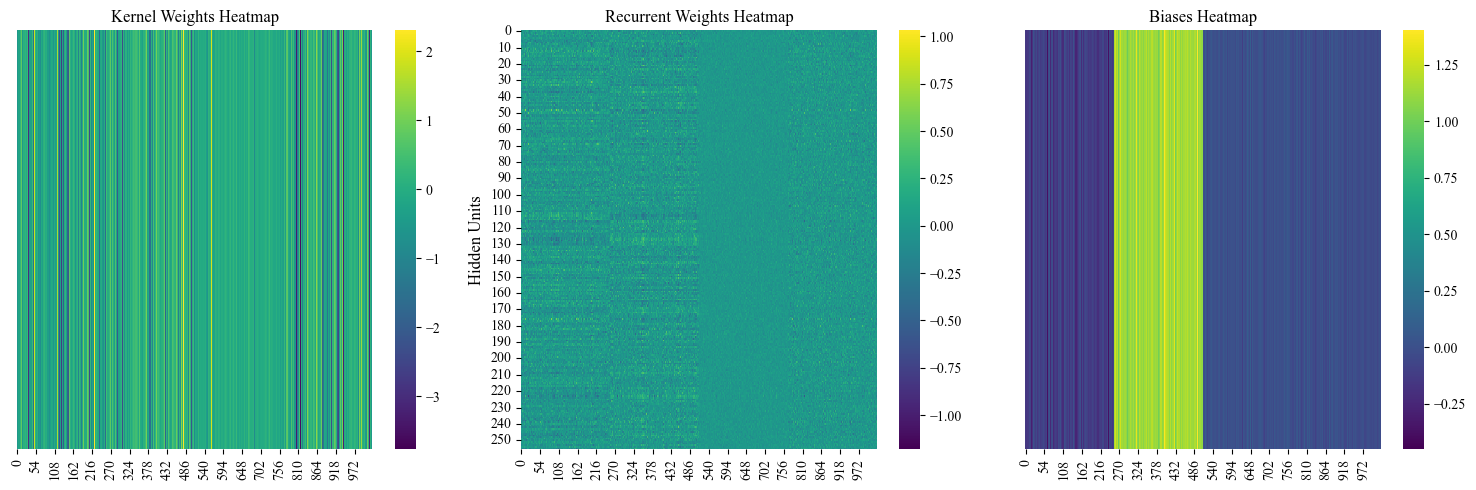

Model: GRU


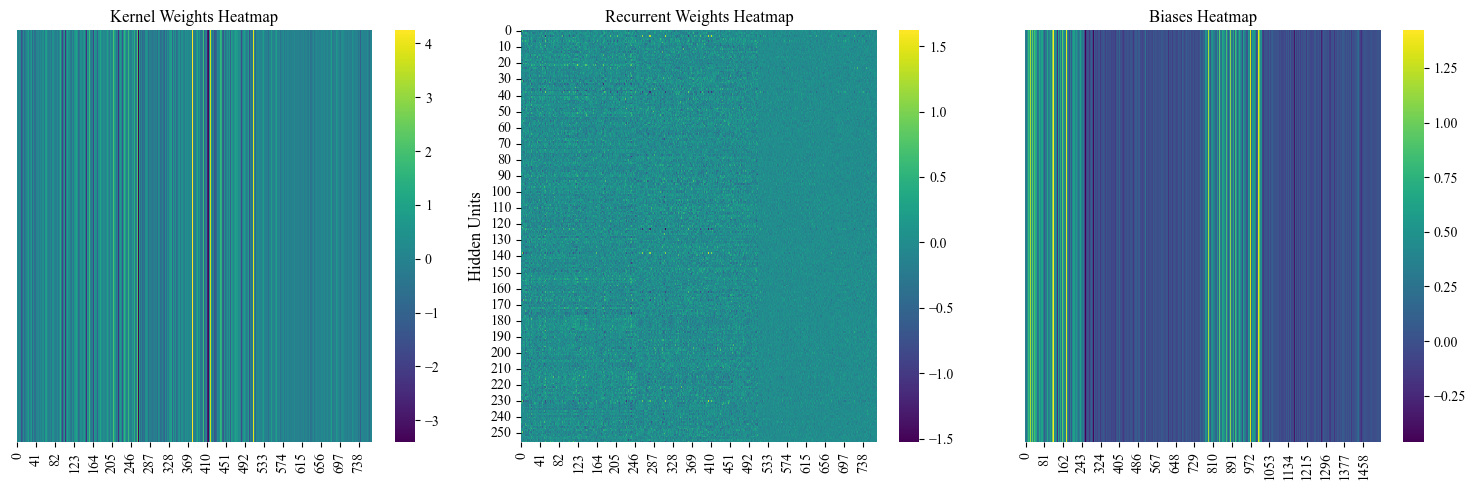

In [157]:
for name, model in models1.items():
    print(f'Model: {name}')
    weights = model.layers[0].get_weights()
    # Kernel weights (input to hidden)
    kernel_weights = weights[0]
    # Recurrent weights (hidden to hidden)
    recurrent_weights = weights[1]
    # Biases
    biases = weights[2]
    
    # Plot heatmaps
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    sns.heatmap(kernel_weights, cmap='viridis', cbar=True)
    plt.title('Kernel Weights Heatmap')
    # plt.xlabel('Hidden Units')
    plt.ylabel('')  # Remove y-axis label
    plt.yticks([])  # Remove y-axis ticks
    # plt.ylabel('Input Features')

    plt.subplot(1, 3, 2)
    sns.heatmap(recurrent_weights, cmap='viridis', cbar=True)
    plt.title('Recurrent Weights Heatmap')
    # plt.xlabel('Hidden Units')
    plt.ylabel('Hidden Units')

    plt.subplot(1, 3, 3)
    sns.heatmap(biases.reshape(1, -1), cmap='viridis', cbar=True)
    plt.title('Biases Heatmap')
    # plt.xlabel('Bias Units')
    plt.yticks([])

    plt.tight_layout()
    plt.savefig(f'./Figures/{name}_weights_heatmaps_trained_model.png', dpi=300)
    
    plt.show()

Model: sRNN


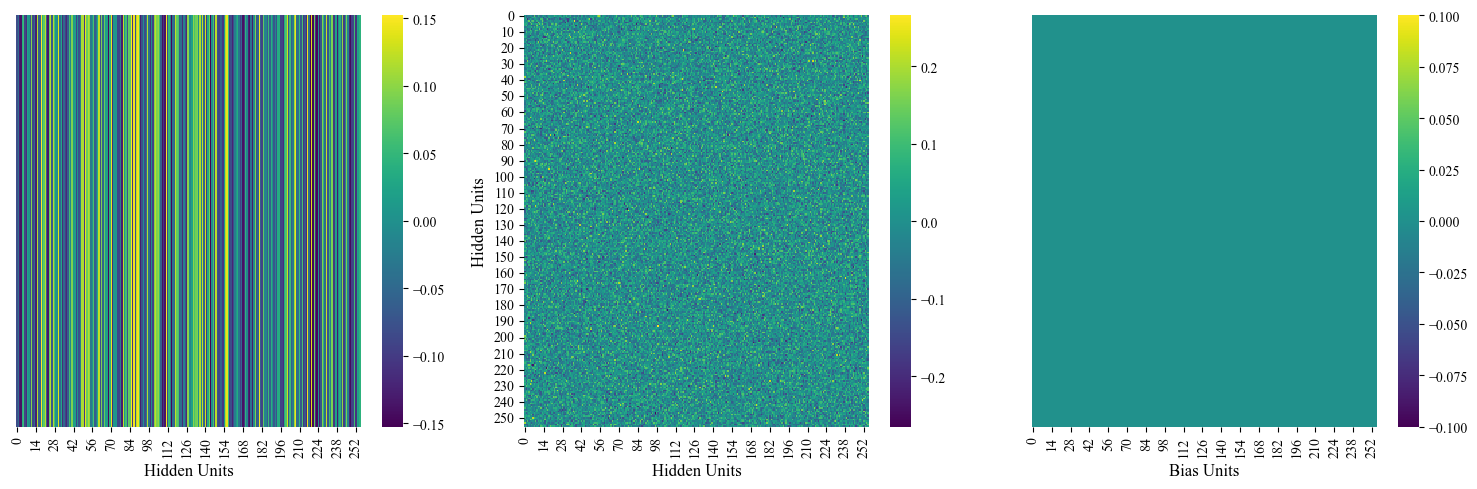

Model: LSTM


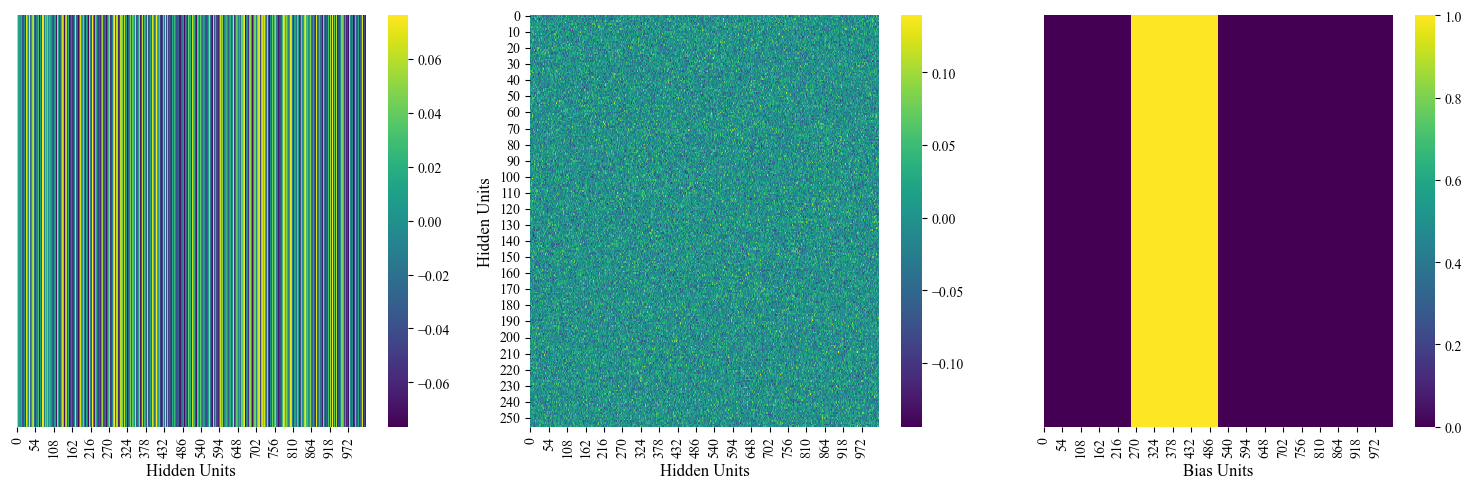

Model: GRU


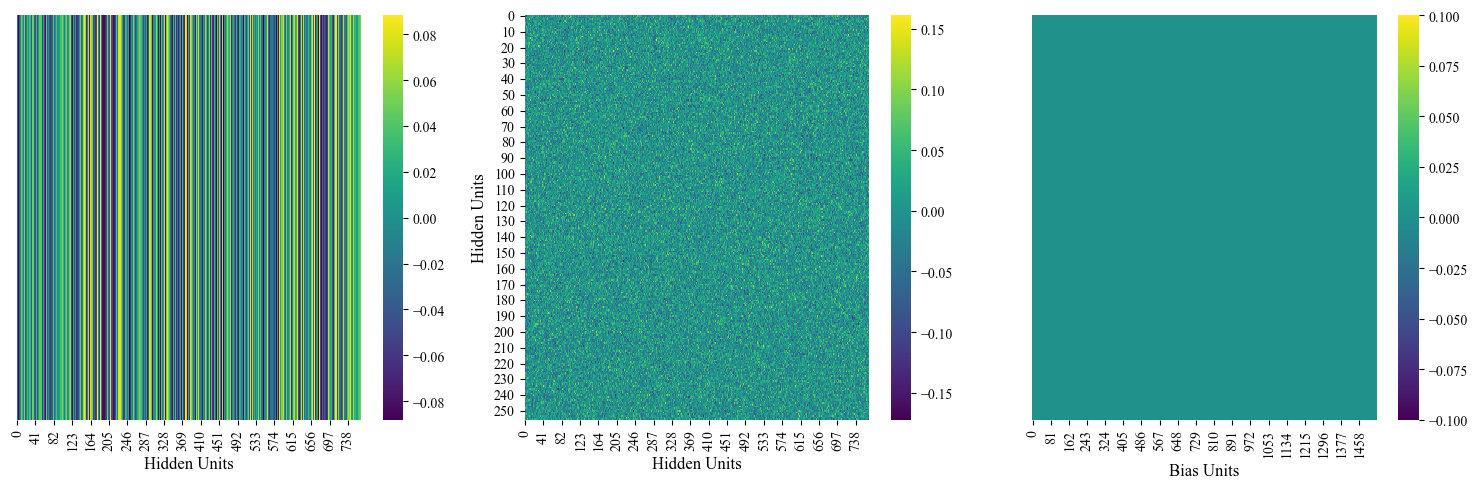

In [156]:
for name, model in non_trained_models.items():
    print(f'Model: {name}')
    weights = model.layers[0].get_weights()
    # Kernel weights (input to hidden)
    kernel_weights = weights[0]
    # Recurrent weights (hidden to hidden)
    recurrent_weights = weights[1]
    # Biases
    biases = weights[2]
    
    # Plot heatmaps
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    sns.heatmap(kernel_weights, cmap='viridis', cbar=True)
    # plt.title('Kernel Weights Heatmap')
    plt.xlabel('Hidden Units')
    plt.ylabel('')  # Remove y-axis label
    plt.yticks([])  # Remove y-axis ticks
    # plt.ylabel('Input Features')

    plt.subplot(1, 3, 2)
    sns.heatmap(recurrent_weights, cmap='viridis', cbar=True)
    # plt.title('Recurrent Weights Heatmap')
    plt.xlabel('Hidden Units')
    plt.ylabel('Hidden Units')

    plt.subplot(1, 3, 3)
    sns.heatmap(biases.reshape(1, -1), cmap='viridis', cbar=True)
    # plt.title('Biases Heatmap')
    plt.xlabel('Bias Units')
    plt.yticks([])

    plt.tight_layout()
    plt.savefig(f'./Figures/{name}_weights_heatmaps_non_trained_model.png', dpi=300)
    
    plt.show()